<a href="https://colab.research.google.com/gist/k0pch4/43147bce54152b3d4e69e89af6e5e7fa/assignment-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Assignment 7](https://nipunbatra.github.io/teaching/ml-spring-19/hw/7.pdf)

# Q1 (a)
Implementation of the SVM for hard margins

### Author - Apoorv Agnihotri

Citations:

- https://github.com/nipunbatra/nipunbatra.github.io/blob/master/teaching/ml-spring-19/notebooks/svm-rbf.ipynb

In [0]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

class SVM:
  """Implements a SVM Classifier
  @todo supoort different kernels
  @todo support soft svm
  """
  def __init__(self,
               method='hard',
               kernel='linear',
               C=1e3):
    self.soft = True if method == 'soft' else False
    self.kernal = kernel
    self.C = C
    self.prob = None
    self.disctrete_out = True

  def train(self, X, Y):
    '''Assumes that each row is a sample'''
    # Create two optimization variables.
    w = cp.Variable(X.shape[1])
    b = cp.Variable()
    
    # Create constraints.
    constraints = self._create_cons(Y, X, w, b)

    # Form objective.
    obj = (1/2)*cp.norm(w,2)
    if self.soft:
      obj = obj/(self.C)
      for i in range(X.shape[0]):
        temp = cp.maximum(0, 1 - Y[i] * (w @ np.squeeze(X[i, :]) + b))
        obj = obj + temp
    obj = cp.Minimize(obj)

    # Form and solve problem.
    prob = cp.Problem(obj, constraints)
    prob.solve()  # Returns the optimal value.
    
    # storing for future accesses
    self.obj = obj
    self.constraints = constraints
    self.prob = prob
    self.w = w
    self.b = b

  def _create_cons(self, Y, X, w, b):
    '''For the case of soft svm we don't use any
    constrains'''
    m = X.shape[0]
    exprs = []
    if not self.soft:
      for i in range(m):
        expr = (Y[i] * (w @ np.squeeze(X[i, :]) + b))>= 1
        exprs.append(expr)
    return exprs
  
  def see_dual(self):
    if isinstance(self.prob, type(None)):
      raise ValueError("SVM has not been trained yet!")
    alphas = []
    for constraint in self.constraints:
      alphas.append(constraint.dual_value)
    return np.array(alphas)

  def predict(self, X):
    y_pred = []
    for i in range(X.shape[0]):
      temp = self.w @ np.squeeze(X[i, :]) + self.b
      y_pred.append(float(temp.value))
    y_pred = np.asarray(y_pred)
    self.y_pred = y_pred.copy() # storing for future access
    if not self.soft or self.disctrete_out:
      temp = y_pred >= 0
      y_pred = temp*1
      y_pred += np.logical_not(temp) * -1
    return y_pred


In [0]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def generate_data(seed=4, divider='setosa', features=[0, 3]):
  iris = datasets.load_iris()
  X = iris.data[:, features]
  
  y = iris.target
  X, y = shuffle(X, y, random_state=seed)
  
  # making +ve / -ve classes
  targets = iris.target_names.copy()
  ix = list(targets).index(divider)
  y_new = (y == ix) * 1
  y_new += (y != ix) * -1
  
  return X, y_new

def data_split(X, y, test_size=.2):
  tupl = train_test_split(X, y, test_size=test_size)
  X_train, X_test, y_train, y_test = tupl
  return X_train, X_test, y_train, y_test

In [0]:
tpl = data_split(*generate_data(divider='setosa'))
X_train, X_test, y_train, y_test = tpl

# Q1 (a) (i)
Showing the use case for the implemented SVM.

In [0]:
svm = SVM(method='hard')
svm.train(X_train, y_train)
y_pred = svm.predict(X_test)

# Q1 (a) (ii)
Yes we can see the dual values. The Dual values are propotional to the increase in objective function if that constrain is relaxed by some amount.

In [5]:
alphas = svm.see_dual()
alphas

array([2.72345918e-12, 8.91202513e-13, 2.18008329e-12, 7.08540442e-13,
       1.94943085e-12, 8.58787163e-01, 2.14491368e-12, 1.14133253e-12,
       2.82375721e-12, 2.31674498e-12, 1.51230802e-12, 2.18008329e-12,
       2.82375721e-12, 1.68836547e-12, 1.19294200e-12, 1.76290661e-12,
       2.25809711e-12, 3.65337255e-12, 8.25377638e-13, 2.49237138e-12,
       1.20253236e-12, 1.90855145e-12, 3.82293602e-12, 6.95753417e-13,
       1.20876171e-12, 8.73800507e-12, 1.01475322e-12, 1.70645926e-12,
       1.65985074e-12, 8.88201031e-13, 3.18626049e-12, 5.99466018e-13,
       1.54954135e-12, 3.00565875e-12, 2.11143583e-12, 8.32024461e-13,
       2.07917339e-12, 9.55399478e-13, 2.73111572e-02, 4.53767550e-12,
       4.87913996e-12, 2.92702573e-12, 1.51230802e-12, 2.65828146e-12,
       2.34322255e-02, 2.11143583e-12, 9.62579480e-13, 1.35318579e-12,
       2.92702573e-12, 3.13777955e-12, 1.06383843e-12, 1.87610668e-12,
       1.12922482e-12, 9.15360024e-13, 9.13411786e-12, 2.01690896e-12,
      

# Q1 (a) (iii)
My implementation plotted.

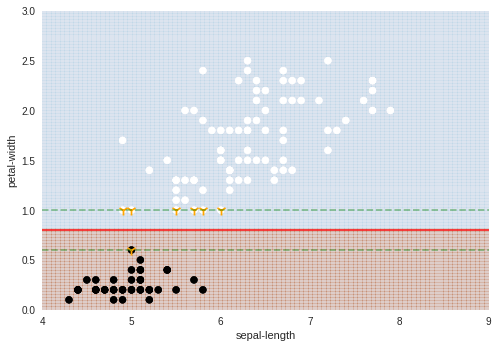

In [6]:
import matplotlib.pyplot as plt
svm = SVM(method='hard')
svm.train(X_train, y_train)
y_pred = svm.predict(X_test)
plt.xlabel("sepal-length")
plt.ylabel("petal-width")
x1 = np.linspace(4,9,100)
x2 = np.linspace(0,3,100)
X1, X2 = np.meshgrid(x1, x2)
Z = svm.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.pcolormesh(X1, X2, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

x1 = np.linspace(4,9,40)
divide = (-svm.w.value[0] * x1 - svm.b.value)/svm.w.value[1]
plt.plot(x1, divide, 'r-', alpha=0.8)
divide = (-svm.w.value[0] * x1 - 1 - svm.b.value)/svm.w.value[1]
plt.plot(x1, divide, 'g--', alpha=0.4)
divide = (-svm.w.value[0] * x1 + 1 - svm.b.value)/svm.w.value[1]
plt.plot(x1, divide, 'g--', alpha=0.4);
mask = np.greater(alphas, 1e-7)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);
plt.scatter(X_train[mask, 0], X_train[mask, 1], c='orange',
            marker="1", s=100, label="Support Vectors")
plt.xlabel("sepal-length")
plt.ylabel("petal-width");

# Q1 (a) (iv)
Sklearn implementation Plotted.

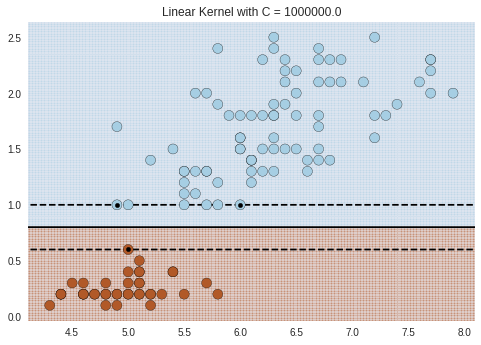

In [7]:
from sklearn.svm import SVC

X = X_train
y=y_train
C = 1e6
kernel = 'linear'

clf = SVC(kernel=kernel, C=C)
clf.fit(X_train, y_train)

plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolor='k', s=100)


plt.axis('tight')
x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1
y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.title("Linear Kernel with C = {}".format(C))
svs = clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k', edgecolor='k', s=20)

# Q1(a)(v)
Yes, even when we throw away all the _non support vectors_ we get the same decision boundary as these constraints where having thier dual values nearly 0, meaning that the minimization that we did for the support vector machine was not limited by these points.

In [0]:
svm = SVM(method='hard')
svm.train(X_train[mask, :], y_train[mask])

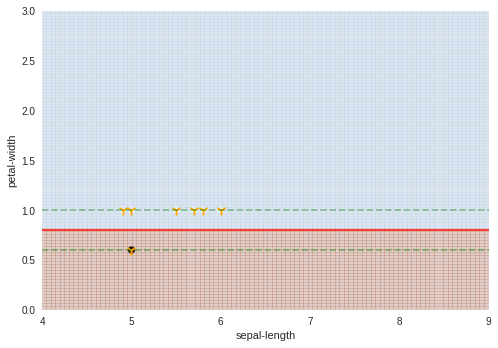

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_train[mask, 0], X_train[mask, 1], c=y_train[mask])
plt.xlabel("sepal-length")
plt.ylabel("petal-width")
x1 = np.linspace(4,9,100)
x2 = np.linspace(0,3,100)
X1, X2 = np.meshgrid(x1, x2)
Z = svm.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.pcolormesh(X1, X2, Z, cmap=plt.cm.Paired, alpha=0.2)

x1 = np.linspace(4,9,40)
divide = (-svm.w.value[0] * x1 - svm.b.value)/svm.w.value[1]
plt.plot(x1, divide, 'r-', alpha=0.8)
divide = (-svm.w.value[0] * x1 - 1 - svm.b.value)/svm.w.value[1]
plt.plot(x1, divide, 'g--', alpha=0.4)
divide = (-svm.w.value[0] * x1 + 1 - svm.b.value)/svm.w.value[1]
plt.plot(x1, divide, 'g--', alpha=0.4);

plt.scatter(X_train[mask, 0], X_train[mask, 1], c='orange',
            marker="1", s=100)

# Q1(b)
Done above in **Q1(a)**.

# Q1(b)(i)
No I was not able to use the autograd. The reason that I was not able to use autgrad was that the hinge loss is a non differntiable function and autograd assumes functions to be differentiable to automatically calculate the derivatives for the respective functions.

# Q1(b)(ii)

We can easily see that the classes are not linearly separable. Below is the sample usage of the implementation that I came up with.

In [0]:
# getting the required data
tpl = data_split(*generate_data(divider='virginica', features=[0,1]))
X_train, X_test, y_train, y_test = tpl

# showing the usage of my implementation
svm = SVM(method='soft')
svm.train(X_train, y_train)
y_pred = svm.predict(X_test)

In [11]:
print ('acc:')
abs(sum(y_pred == y_test)) / len(y_pred)

acc:


0.8333333333333334

Demo below.

Text(0.5, 1.0, 'Self Implementation Kernel with C = 10')

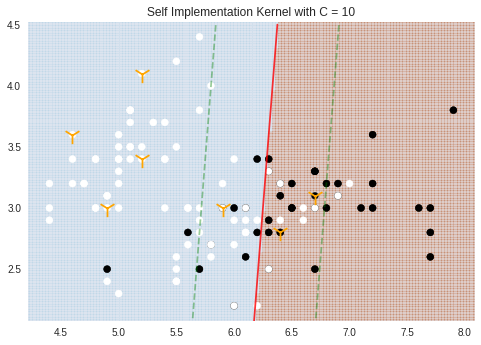

In [16]:
# inspired from https://github.com/nipunbatra/nipunbatra.github.io/blob/master/teaching/ml-spring-19/notebooks/svm-rbf.ipynb
X = X_train
y = y_train
C = 10
svm = SVM(method='soft', C=C)
svm.train(X_train, y_train)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.axis('tight')
x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1
y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

x2 = np.linspace(1.8,4.5,40)
divide = (-svm.w.value[1] * x2 - svm.b.value)/svm.w.value[0]
plt.plot(divide, x2, 'r-', alpha=0.8)
divide = (-svm.w.value[1] * x2 - 1 - svm.b.value)/svm.w.value[0]
plt.plot(divide, x2, 'g--', alpha=0.4)
divide = (-svm.w.value[1] * x2 + 1 - svm.b.value)/svm.w.value[0]
plt.plot(divide, x2, 'g--', alpha=0.4);
mask = np.greater(alphas, 1e-7)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_train[mask, 0], X_train[mask, 1], c='orange',marker="1", s=300)
plt.title("Self Implementation Kernel with C = {}".format(C))


# Q1(b)(iii)
The plot that we get after using the Scklearn's implementation for the soft margin SVM.

Encircled the support vectors.

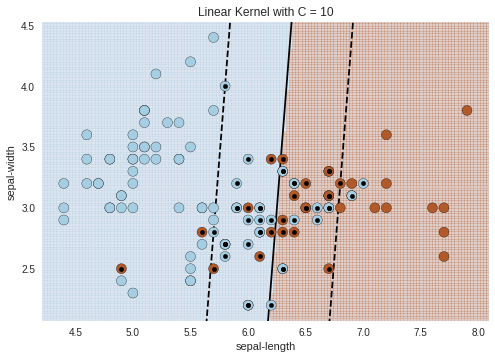

In [13]:
X = X_train
y = y_train
C = 10
kernel = 'linear'

clf = SVC(kernel=kernel, C=C)
clf.fit(X_train, y_train)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolor='k', s=100)


plt.axis('tight')
x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1
y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.title("Linear Kernel with C = {}".format(C))
svs = clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k', edgecolor='k', s=20)
plt.xlabel("sepal-length")
plt.ylabel("sepal-width");

# Q1(b)(iv)

If we increase the values for the hyperparams `gamma` and `degree` for the case of kernels _rbf_ and _poly_ respectively, we see that the model increasingly becomes more complex and has a higher variance compared to the models that were formed by using smaller values for the given hyperparameters.

Another observation that I can make is that the complexity of the model comes at the cost of teh test accuracy as the model at higher values of the above hyperparameters is not able to generalize well.

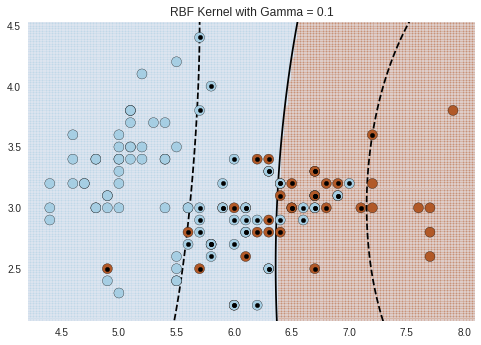

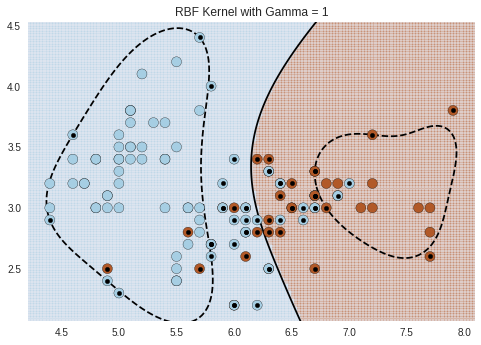

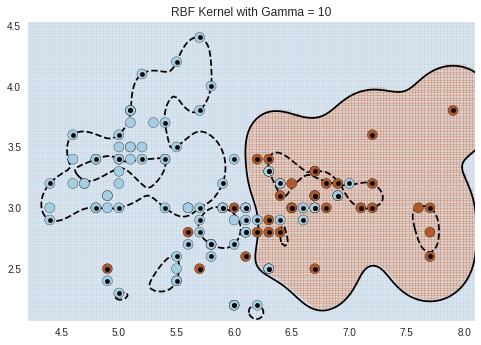

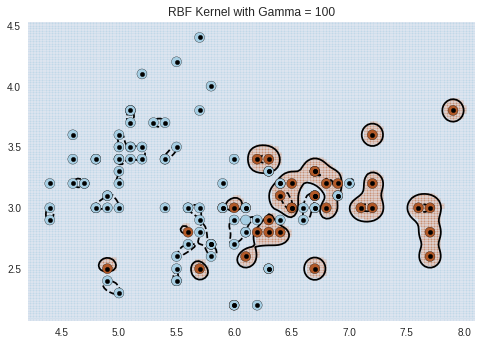

In [14]:
# inspired from https://github.com/nipunbatra/nipunbatra.github.io/blob/master/teaching/ml-spring-19/notebooks/svm-rbf.ipynb
from sklearn import svm
kernel = 'rbf'
X = X_train
y = y_train
for fig_num, gamma in enumerate([0.1, 1, 10, 100]):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.title("RBF Kernel with Gamma = {}".format(gamma))
    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k', edgecolor='k', s=20)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


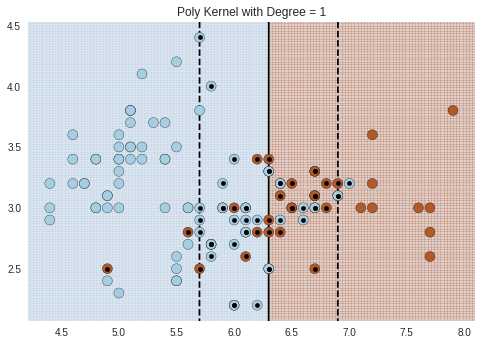

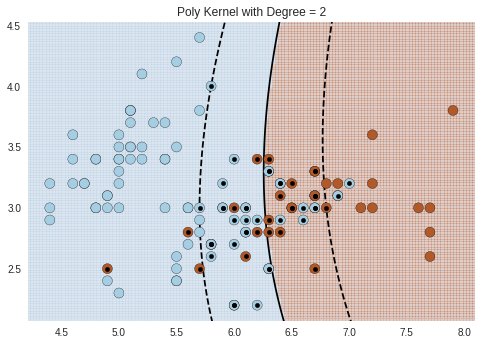

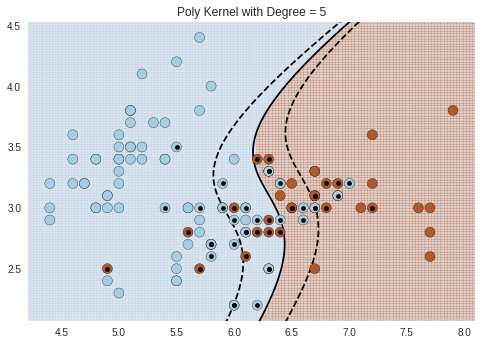

In [15]:
# inspired from https://github.com/nipunbatra/nipunbatra.github.io/blob/master/teaching/ml-spring-19/notebooks/svm-rbf.ipynb
from sklearn import svm
kernel = 'poly'
X = X_train
y = y_train
for fig_num, degree in enumerate([1, 2, 5]):
    clf = svm.SVC(kernel=kernel, degree=degree)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.title("Poly Kernel with Degree = {}".format(degree))
    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k', edgecolor='k', s=20)